# Chernoff Faces Example
In this notebook we demonstrate the usage of vislint on a chernoff faces chart. We start by import the necessary packages, as well as function for creating chernoff faces.

In [2]:
from pylab import *

import time, array, random, copy, math, six, itertools

# hacky path usage to import vislint_mpl
import sys
sys.path.append('../../lint_rules')
sys.path.append('../../')
from vislint import vislint

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [3]:
# chernoff faces from
# https://gist.github.com/aflaxman/4043086
def cface(ax, x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18):
    # x1 = height  of upper face
    # x2 = overlap of lower face
    # x3 = half of vertical size of face
    # x4 = width of upper face
    # x5 = width of lower face
    # x6 = length of nose
    # x7 = vertical position of mouth
    # x8 = curvature of mouth
    # x9 = width of mouth
    # x10 = vertical position of eyes
    # x11 = separation of eyes
    # x12 = slant of eyes
    # x13 = eccentricity of eyes
    # x14 = size of eyes
    # x15 = position of pupils
    # x16 = vertical position of eyebrows
    # x17 = slant of eyebrows
    # x18 = size of eyebrows
    
    # transform some values so that input between 0,1 yields variety of output
    x3 = 1.9*(x3-.5)
    x4 = (x4+.25)
    x5 = (x5+.2)
    x6 = .3*(x6+.01)
    x8 = 5*(x8+.001)
    x11 /= 5
    x12 = 2*(x12-.5)
    x13 += .05
    x14 += .1
    x15 = .5*(x15-.5)
    x16 = .25*x16
    x17 = .5*(x17-.5)
    x18 = .5*(x18+.1)

    # top of face, in box with l=-x4, r=x4, t=x1, b=x3
    e = mpl.patches.Ellipse( (0,(x1+x3)/2), 2*x4, (x1-x3), fc='white', linewidth=2)
    ax.add_artist(e)

    # bottom of face, in box with l=-x5, r=x5, b=-x1, t=x2+x3
    e = mpl.patches.Ellipse( (0,(-x1+x2+x3)/2), 2*x5, (x1+x2+x3), fc='white', linewidth=2)
    ax.add_artist(e)

    # cover overlaps
    e = mpl.patches.Ellipse( (0,(x1+x3)/2), 2*x4, (x1-x3), fc='white', ec='none')
    ax.add_artist(e)
    e = mpl.patches.Ellipse( (0,(-x1+x2+x3)/2), 2*x5, (x1+x2+x3), fc='white', ec='none')
    ax.add_artist(e)
    
    # draw nose
    plot([0,0], [-x6/2, x6/2], 'k')
    
    # draw mouth
    p = mpl.patches.Arc( (0,-x7+.5/x8), 1/x8, 1/x8, theta1=270-180/pi*arctan(x8*x9), theta2=270+180/pi*arctan(x8*x9))
    ax.add_artist(p)
    
    # draw eyes
    p = mpl.patches.Ellipse( (-x11-x14/2,x10), x14, x13*x14, angle=-180/pi*x12, facecolor='white')
    ax.add_artist(p)
    
    p = mpl.patches.Ellipse( (x11+x14/2,x10), x14, x13*x14, angle=180/pi*x12, facecolor='white')
    ax.add_artist(p)

    # draw pupils
    p = mpl.patches.Ellipse( (-x11-x14/2-x15*x14/2, x10), .05, .05, facecolor='black')
    ax.add_artist(p)
    p = mpl.patches.Ellipse( (x11+x14/2-x15*x14/2, x10), .05, .05, facecolor='black')
    ax.add_artist(p)
    
    # draw eyebrows
    plot([-x11-x14/2-x14*x18/2,-x11-x14/2+x14*x18/2],[x10+x13*x14*(x16+x17),x10+x13*x14*(x16-x17)],'k')
    plot([x11+x14/2+x14*x18/2,x11+x14/2-x14*x18/2],[x10+x13*x14*(x16+x17),x10+x13*x14*(x16-x17)],'k')


Now we are ready to go! Let's see what our faces look like

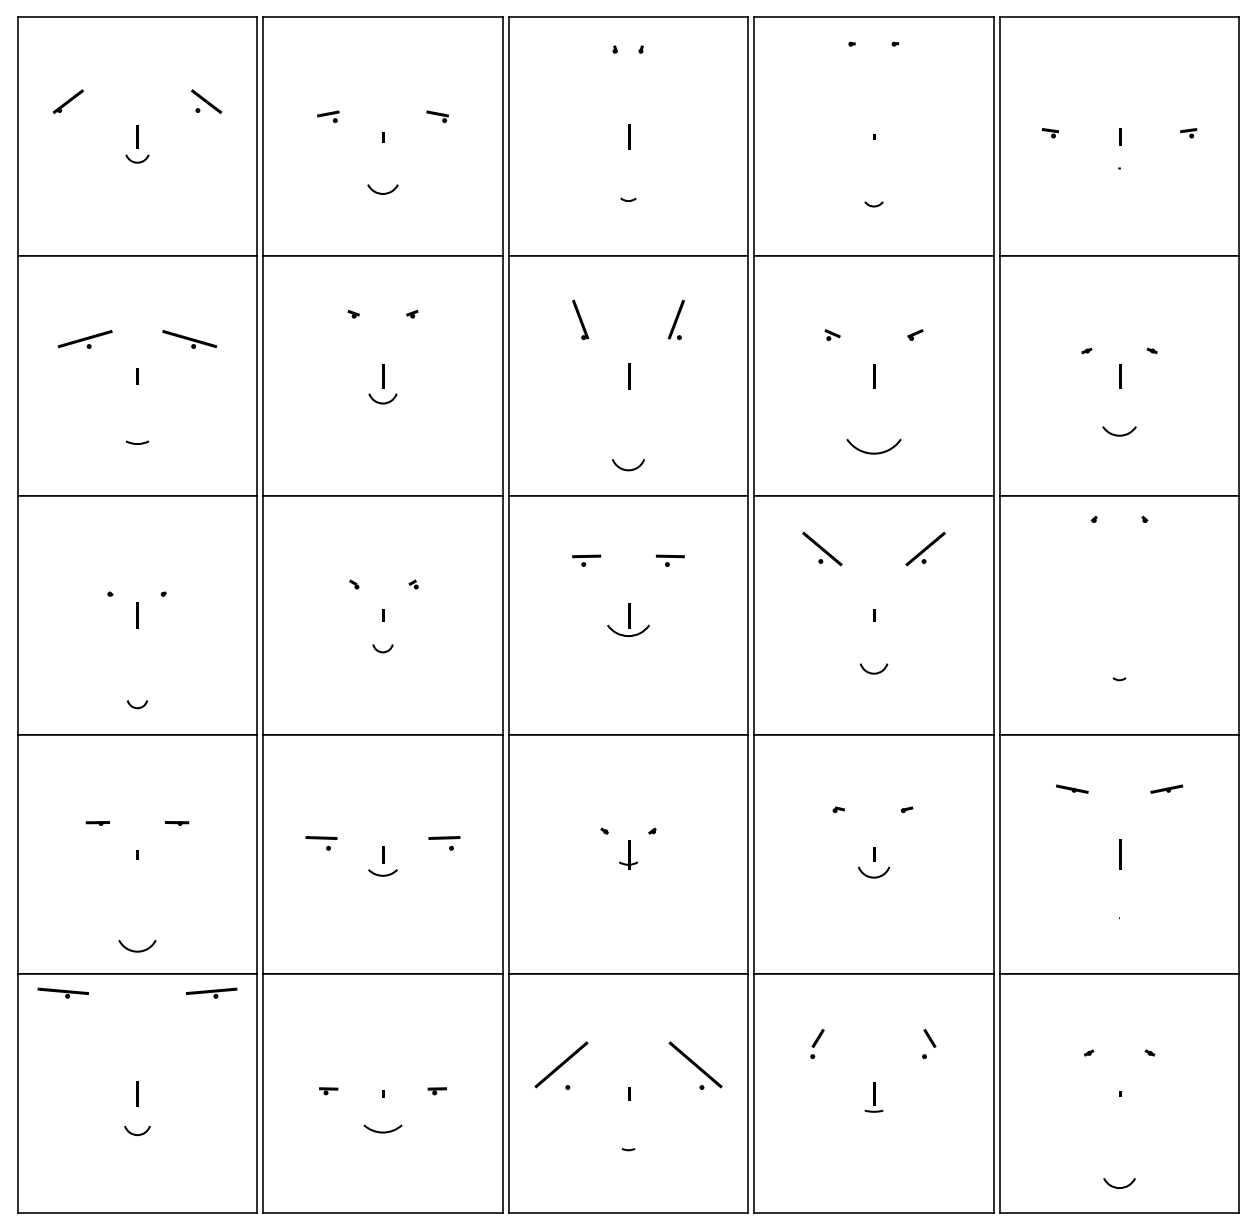

In [4]:
fig = figure(figsize=(11,11))
for i in range(25):
    ax = fig.add_subplot(5,5,i+1,aspect='equal')
    cface(ax, .9, *rand(17))
    ax.axis([-1.2,1.2,-1.2,1.2])
    ax.set_xticks([])
    ax.set_yticks([])

fig.subplots_adjust(hspace=0, wspace=0)

Unfortunately, vislint doesn't currently support small multiples so we focus our attention on a single one of the figures and pass that through lint. As we can see below not all of the responses make sense (eg no-indistinguisable-series is quite applicable here), but it does usefully suggest that we should apply titles and axes.

In [13]:
vislint(fig.get_axes()[0], plt, {})

[('require-titles', 'Titles are required'),
 ('no-short-titles',
  'Short titles are not allowed (must be greater than 1 word)'),
 ('require-axes', 'Axes must be labeled'),
 ('require-legend', 'A legend must be used'),
 ('no-indistinguishable-series', 'Series must be distinguishable')]

<Figure size 432x288 with 0 Axes>